In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('SalaryData.xlsx')

In [3]:
df.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [104]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,40.0,162186.875,64860.407506,50103.0,99897.5,169100.0,214440.75,260151.0


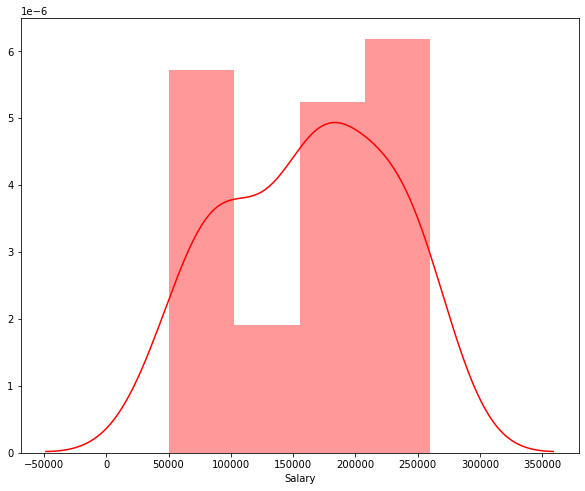

In [105]:
plt.figure(figsize=(10,8))
sns.distplot(df['Salary'], color='r');

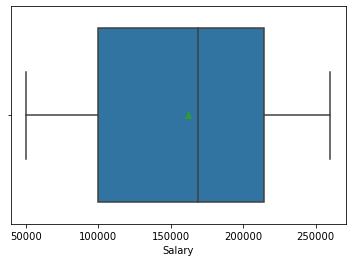

In [5]:
sns.boxplot(x='Salary',data=df,showmeans=True);

###### Lets test the normality using Shapiro-Wilk's test. 
###### Ho: Salary follows a normal distribution against H1: Salary does not follow a normal distribution

In [107]:
from scipy import stats

In [108]:
# For testing of normality, Shapiro-Wilk’s test is applied
w, p_value = stats.shapiro(df['Salary'])
print("W = {}".format(w), "p_value = {}".format(p_value))

W = 0.9401417970657349 p_value = 0.03496258333325386


###### Since p-value is smaller than the level of significance, we reject the null hypothesis and conclude that the feature Salary does not follow a Normal Distribution.

In [109]:
df['Education'].value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [110]:
df.groupby('Education')['Salary'].mean()

Education
 Bachelors    165152.933333
 Doctorate    208427.000000
 HS-grad       75038.777778
Name: Salary, dtype: float64

In [111]:
df['Occupation'].value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

In [112]:
df.groupby('Occupation')['Salary'].mean()

Occupation
 Adm-clerical       141424.300000
 Exec-managerial    197117.600000
 Prof-specialty     168953.153846
 Sales              157604.416667
Name: Salary, dtype: float64

##### 1.1 State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

###### Null Hypothesis - Ho: Mean Salary across Education levels are same
###### Alternative Hypothesis - H1 : Mean Salary for atleast one of the Education levels are different

###### Null Hypothesis - Ho: Mean Salary across Occupation levels are same.
###### Alternative Hypothesis - H1: Mean Salary for at least one of the Occupation levels are different.


##### 1.2. Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

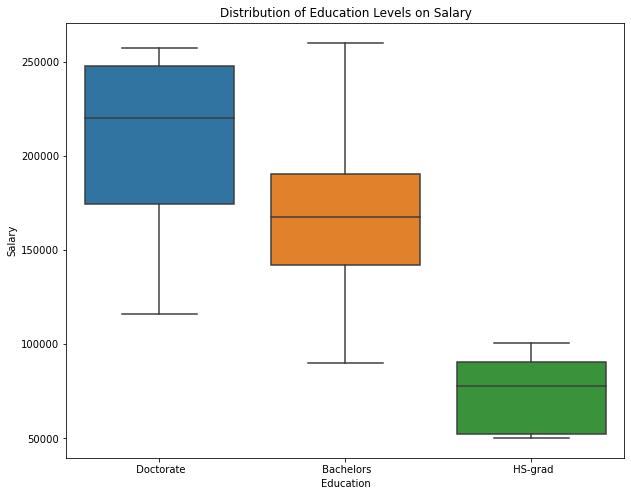

In [113]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Education',y='Salary',data=df);
plt.title('Distribution of Education Levels on Salary');

In [114]:
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

In [115]:
formula = 'Salary~Education'
model = ols(formula,df).fit()
anova_table1 = anova_lm(model)
anova_table1

,df,sum_sq,mean_sq,F,PR(>F)
Education,2.0,1.026955e+11,5.134773e+10,30.95628,1.257709e-08
Residual,37.0,6.137256e+10,1.658718e+09,NaN,NaN


In [116]:
pvalue = anova_table1['PR(>F)'][0]
pvalue

1.2577090926629106e-08

In [117]:
alpha = 0.05

In [118]:
pvalue < alpha

True

###### pvalue = 1.2577090926629106e-08 which is less than the level of significance alpha (0.05). Hence we reject the null hypothesis and conclude that the mean Salary across Education levels are not same. 

##### 1.3. Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

###### Null Hypothesis - Ho : Mean Salary across Occupation levels are same. 
###### Alternative Hypothesis - H1 : Mean Salary for atleast one of the Occupation levels are different.

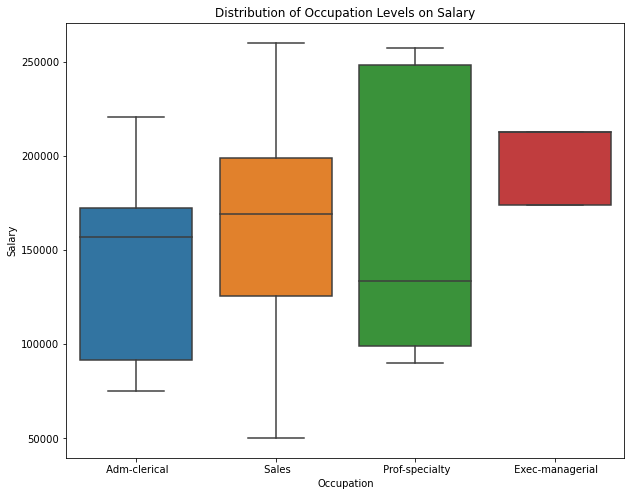

In [119]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Occupation',y='Salary',data=df);
plt.title('Distribution of Occupation Levels on Salary');

In [120]:
formula = 'Salary~Occupation'
model = ols(formula,df).fit()
anova_table2 = anova_lm(model)
anova_table2

,df,sum_sq,mean_sq,F,PR(>F)
Occupation,3.0,1.125878e+10,3.752928e+09,0.884144,0.458508
Residual,36.0,1.528092e+11,4.244701e+09,NaN,NaN


In [121]:
pvalue = anova_table2['PR(>F)'][0]
pvalue

0.4585078266495116

In [122]:
alpha = 0.05

In [123]:
pvalue > alpha

True

###### pvalue = 0.4585078266495116 which is greater than the level of significance alpha (0.05). Hence we accept the Null Hypothesis to conclude that Mean Salary across Occupation levels are same. 

##### 1.4 If the null hypothesis is rejected in either (1.2) or in (1.3), find out which class means are significantly different. Interpret the result.

In [149]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,MultiComparison)

In [150]:
mod1 = MultiComparison(df['Salary'],df['Education'])
print(mod1.tukeyhsd().summary())

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


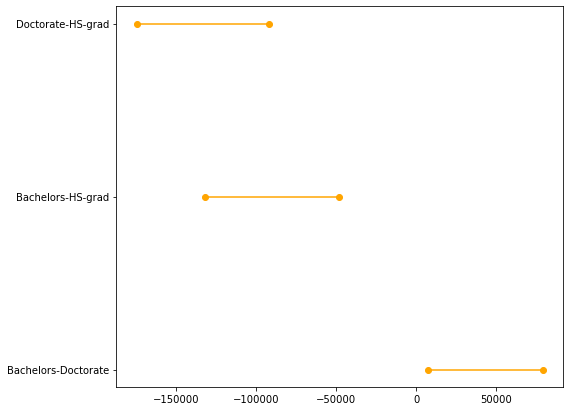

In [151]:
results = mod1.tukeyhsd()
df1=results.summary()
results_as_html = df1.as_html()
df1=pd.read_html(results_as_html, header=0, index_col=0)[0].reset_index(
)
groups = np.array([df1.group1+ '-'+ df1.group2])
plt.figure(figsize=(8,7))
data_dict = {}
data_dict['object'] = groups.ravel()
data_dict['lower'] = results.confint[:,0]
data_dict['upper'] = results.confint[:,1]
dataset = pd.DataFrame(data_dict)
for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
    plt.plot((lower,upper),(y,y),'ro-',color='orange')
    plt.yticks(range(len(dataset)),list(dataset['object']));

###### P-value is significant for comparing Salary mean levels for the pairs Bachelors-Doctorate, Bachelors-HS-grad and Doctorate-HS-grad. The null hypothesis of equality of all population means is rejected. It is now clear that mean Salary for Bachelors-HS-grad and Doctorate-HS-grad is similar but mean salary for Baechelors-Doctorate is significantly different from these two. 

In [152]:
mod2 = MultiComparison(df['Salary'],df['Occupation'])
print(mod2.tukeyhsd().summary())

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
     group1           group2        meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------------------------
    Adm-clerical  Exec-managerial     55693.3 0.4146  -40415.1459 151801.7459  False
    Adm-clerical   Prof-specialty  27528.8538 0.7252  -46277.4011 101335.1088  False
    Adm-clerical            Sales  16180.1167    0.9  -58951.3115  91311.5449  False
 Exec-managerial   Prof-specialty -28164.4462 0.8263 -120502.4542  64173.5618  False
 Exec-managerial            Sales -39513.1833 0.6507 -132913.8041  53887.4374  False
  Prof-specialty            Sales -11348.7372    0.9  -81592.6398  58895.1655  False
------------------------------------------------------------------------------------


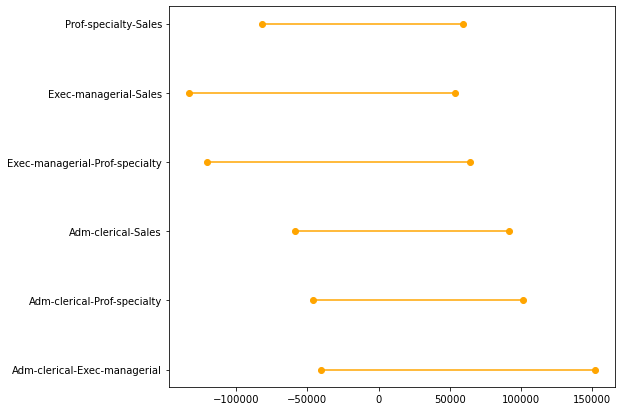

In [153]:
results = mod2.tukeyhsd()
df2=results.summary()
results_as_html = df2.as_html()
df2=pd.read_html(results_as_html, header=0, index_col=0)[0].reset_index(
)
groups = np.array([df2.group1+ '-'+ df2.group2])
plt.figure(figsize=(8,7))
data_dict = {}
data_dict['object'] = groups.ravel()
data_dict['lower'] = results.confint[:,0]
data_dict['upper'] = results.confint[:,1]
dataset = pd.DataFrame(data_dict)
for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
    plt.plot((lower,upper),(y,y),'ro-',color='orange')
    plt.yticks(range(len(dataset)),list(dataset['object']));

###### P-value for difference in means between Adm-clerical and Exec-managerial is 0.4146
###### P-value for difference in means between Adm-clerical and Prof-specialty is 0.7252
###### P-value for difference in means between Adm-clerical and Sales is 0.9
###### P-value for difference in means between Exec-managerial and Prof-specialty is 0.8263
###### P-value for difference in means between Exec-managerial and Sales is 0.6507
###### P-value for difference in means between Prof-specialty and Sales is 0.9

###### Since the P-value is greater than the level of significance 0.05 we can thus conclude that there is no significant difference in the mean for the above occupation level groups. 


##### 1.5 What is the interaction between the two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.

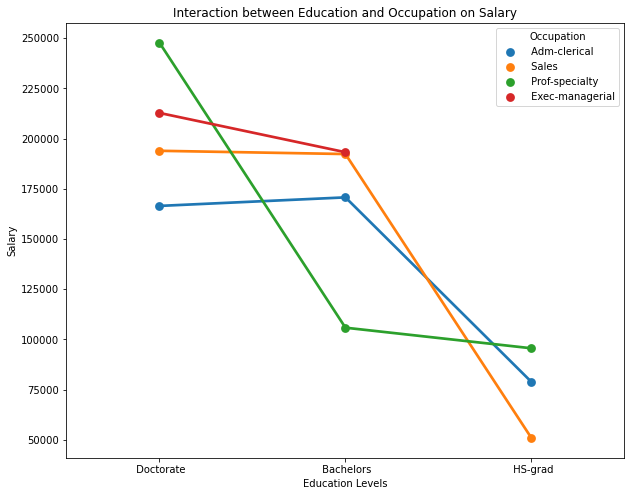

In [128]:
plt.figure(figsize=(10,8))
sns.pointplot(x='Education', y='Salary', data=df, hue='Occupation',ci=None);
plt.title('Interaction between Education and Occupation on Salary');
plt.xlabel('Education Levels')
plt.ylabel('Salary')
plt.show()

###### There is significant impact between Education and Occupation with respect to Salary. As we can see there is an increase in the salary from HS-Grad to Bachelors Education and there is a further increase in Salary from Bachelors Education to Doctorate. 
###### Among Doctorates, Prof-specialty has the highest salary  which is close to 2,50,000 whereas among HS-Grad, Sales has the lowest salary which is close to 50,000. Exec-Managerial and Sales intersect at the same point for Bachelors Education at around 2,00,000. 

##### 1.6 Perform a two-way ANOVA based on the Education and Occupation (along with their interaction Education*Occupation) with the variable ‘Salary’. State the null and alternative hypotheses and state your results. How will you interpret this result?

###### Null Hypothesis - Ho : Mean Salary across Occupation and Education levels are same.
###### Alternative Hypothesis - H1 : Mean Salary for atleast one Occupation and Education level are not same. 

In [129]:
formula = 'Salary~Education+Occupation'
model = ols(formula,df).fit()
anova_table3 = anova_lm(model)
anova_table3

,df,sum_sq,mean_sq,F,PR(>F)
Education,2.0,1.026955e+11,5.134773e+10,31.257677,1.981539e-08
Occupation,3.0,5.519946e+09,1.839982e+09,1.120080,3.545825e-01
Residual,34.0,5.585261e+10,1.642724e+09,NaN,NaN


In [130]:
pvalue_Education = anova_table3['PR(>F)'][0]
pvalue_Occupation = anova_table3['PR(>F)'][1]

In [131]:
pvalue_Education

1.9815392541413873e-08

In [132]:
pvalue_Occupation

0.3545824933162919

In [133]:
alpha = 0.05

In [134]:
pvalue_Education < alpha

True

In [135]:
pvalue_Occupation < alpha

False

###### Since there is interaction between Education and Occupation on Salary, lets introduce a new term while performing Two Way Anova.

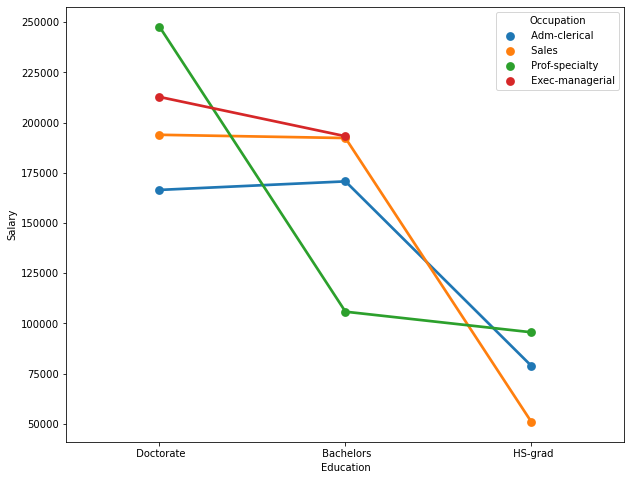

In [136]:
plt.figure(figsize=(10,8))
sns.pointplot(x='Education', y='Salary', data=df, hue='Occupation',ci=None);

In [137]:
formula = 'Salary ~ Education + Occupation + Education:Occupation'
model = ols(formula,df).fit()
anova_table4 = anova_lm(model)
anova_table4

,df,sum_sq,mean_sq,F,PR(>F)
Education,2.0,1.026955e+11,5.134773e+10,72.211958,5.466264e-12
Occupation,3.0,5.519946e+09,1.839982e+09,2.587626,7.211580e-02
Education:Occupation,6.0,3.634909e+10,6.058182e+09,8.519815,2.232500e-05
Residual,29.0,2.062102e+10,7.110697e+08,NaN,NaN


In [138]:
anova_table4['PR(>F)'][0] < 0.05

True

In [139]:
anova_table4['PR(>F)'][1] < 0.05

False

In [140]:
anova_table4['PR(>F)'][2] < 0.05

True

###### Due to the inclusion of the interaction effect term, we can see a slight change in the p-value of the first two treatments as compared to the Two-Way ANOVA without the interaction effect terms. And we see that the p-value of the interaction effect term of 'Education:Occupation' is less than the level of significance (0.05) which suggests that the we reject the Null Hypothesis in this case.

#### 1.7 Explain the business implications of performing ANOVA for this particular case study.

###### CONCLUSION: It is observed that the variation in Salary is significantly impacted by different Education and Occupation levels along with their interaction effect. ANOVA helps to understand which independent factor (Education & Occupation) can explain the variation in the Salary. 

                                                    **THANK YOU**